In [ ]:
import csv
from pathlib import Path
from matplotlib import pyplot as plt
from PIL import Image

file_path = Path.cwd().parent/"data/UNIQOExample/record.csv"
folder_path = file_path.parent

with open(file_path, newline="", mode="r") as csvfile:
    spamreader = csv.reader(csvfile, delimiter=',')
    for i, (query_file, target_file) in enumerate(spamreader):
        fig = plt.figure(figsize=(10,7))

        sub_plot = fig.add_subplot(1, 2, 1)
        sub_plot.axis("off")
        plt.imshow(Image.open(folder_path/"targets"/target_file))

        sub_plot = fig.add_subplot(1, 2, 2)
        sub_plot.axis("off")
        plt.imshow(Image.open(folder_path/"queries"/query_file))


In [ ]:
with open(Path(r"C:\Users\kit97\Documents\GitHub\ImageMatching\data\UNIQOExample\record.csv")) as csvfile:
        spamreader = csv.reader(csvfile, delimiter=',')
        label_of= dict((query, target) for query, target in spamreader )
label_of

AlexNet:
AlexNet Done, inital topk error rate =  71.0%, best = 25.8%

DenseNet:
DenseNet Done, inital topk error rate =  51.6%, best = 25.8%

ConvNeXt:
ConvNeXt Done, inital topk error rate =  48.4%, best = 3.2%

EfficientNet:
EfficientNet Done, inital topk error rate =  41.9%, best = 6.5%

GoogLeNet:
GoogLeNet Done, inital topk error rate =  74.2%, best = 25.8%

Inception3:
Inception3 Done, inital topk error rate =  54.8%, best = 19.4%

MaxVit:
MaxVit Done, inital topk error rate =  61.3%, best = 29.0%

MNASNet:
MNASNet Done, inital topk error rate =  58.1%, best = 19.4%

MobileNetV3:
MobileNetV3 Done, inital topk error rate =  54.8%, best = 12.9%

[0.4623715877532959, 0.4352112412452698, 0.4081374406814575, 0.3810913860797882, 0.3541967570781708, 0.32698893547058105, 0.2999049723148346, 0.27287766337394714, 0.24556443095207214, 0.21821632981300354]


<Figure size 640x480 with 0 Axes>

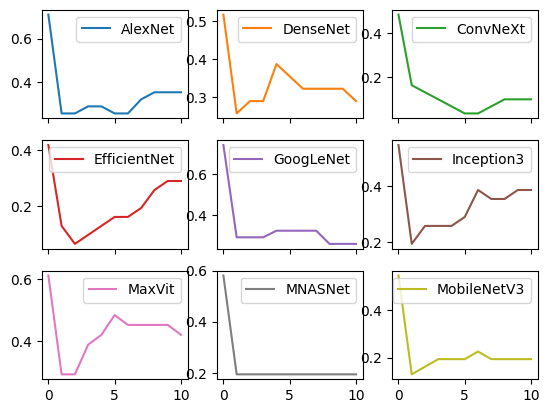

In [14]:
from importlib import reload
import MatchingModels as K
reload(K)
import pandas as pd
from torchvision import models
import torch
from pathlib import Path
from matplotlib import pyplot as plt

transforms_default=K.ToTensor_and_Resize(224)
device = "cpu"
data_path = Path(r"C:\Users\kit97\Documents\GitHub\ImageMatching\data\UNIQOExample")
models_to_try = [
    (models.alexnet, transforms_default), #min_size 63
    (models.densenet121, transforms_default), #29
    (models.convnext_tiny, transforms_default), #32
    (models.efficientnet_b0, transforms_default), #1
    (models.googlenet, transforms_default), #224
    (models.inception_v3, K.ToTensor_and_Resize(299)), #299
    (models.maxvit_t, transforms_default), #224
    (models.mnasnet0_5, transforms_default), #1
    (models.mobilenet_v3_small, transforms_default), #1
] #tuple(model_constructor, transforms for inputs image)

loss_tracking_all, error_rate_tracking_all = pd.DataFrame(), pd.DataFrame()
for model_constructor, transforms_needed in models_to_try:

    (inputs, input_files, labels), (match_targets, match_files) = K.load_labeled_data_csv(data_path, transforms_needed)
    inputs, match_targets = inputs.to(device), match_targets.to(device)

    model = K.FeaturesExtractor(model_constructor, weights="DEFAULT", frozen=False)
    model.to(device)
    print(f"{model.name}:")

    loss_tracking, error_rate_tracking = K.model_trainer(model, inputs, match_targets, labels,
                                                         iter_num = 10, k_in_topk = 1, learn_rate=0.0001) #refactor from above
    print(f"{model.name} Done, inital topk error rate = {error_rate_tracking[0]*100: .1f}%, best = {min(error_rate_tracking)*100 :.1f}%\n")
    loss_tracking_all[model.name] = loss_tracking
    error_rate_tracking_all[model.name] = error_rate_tracking

if device == "cuda":
    torch.cuda.empty_cache()
plt.close()
plt.figure()
error_rate_tracking_all.plot(subplots = True, layout = (3,3))
print(loss_tracking)